In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


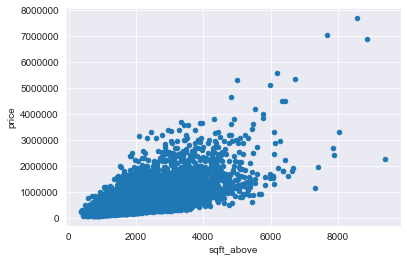

In [2]:
df.plot(kind = 'scatter', x = 'sqft_above', y='price')

In [3]:
df.lat.min()

47.1559

In [4]:
df.price.mean()

540296.5735055795

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.dropna(axis=0, subset=['view'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [7]:
df.waterfront.value_counts(normalize = True)

0.0    0.992434
1.0    0.007566
Name: waterfront, dtype: float64

In [8]:
df['waterfront'].fillna("?", inplace=True)

wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
    
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

In [9]:
df.drop(labels=['yr_renovated'], axis=1, inplace=True)

In [10]:
new_basement = df[df['sqft_basement'] != '?']
new_basement.sqft_basement.astype('float').describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [11]:
basement_mean = new_basement.sqft_basement.astype('float').mean()

def impute_basement(value):
    if value == "?":
        return basement_mean
    else:
        return value
    
df.sqft_basement = df.sqft_basement.map(lambda x: impute_basement(x)).astype('float')

display(df.info())
df['sqft_basement'].value_counts(normalize=True).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.5+ MB


None

0.000000      0.594316
291.359975    0.020990
600.000000    0.010031
500.000000    0.009706
700.000000    0.009613
Name: sqft_basement, dtype: float64

In [12]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month

display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [13]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.007260,0.011592,-0.023944,...,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.242773,0.395734,0.035393,...,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.000402,0.078523,0.026402,...,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.058667,0.186451,-0.126682,...,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.097249,0.282532,-0.059783,...,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.019102,0.075298,-0.008375,...,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020086,0.028436,-0.264138,...,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782
waterfront,-0.007260,0.242773,0.000402,0.058667,0.097249,0.019102,0.020086,1.000000,0.355341,0.015114,...,0.067551,0.076216,-0.021596,0.025478,-0.013692,-0.035565,0.076970,0.027727,0.005710,0.004571
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.355341,1.000000,0.045735,...,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.015114,0.045735,1.000000,...,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347


In [14]:
pd.set_option('display.max_columns', 500)
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.007260,0.011592,-0.023944,0.008331,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.242773,0.395734,0.035393,0.668307,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.000402,0.078523,0.026402,0.356095,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.058667,0.186451,-0.126682,0.665312,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.097249,0.282532,-0.059783,0.762398,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.019102,0.075298,-0.008375,0.115122,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020086,0.028436,-0.264138,0.458694,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782
waterfront,-0.007260,0.242773,0.000402,0.058667,0.097249,0.019102,0.020086,1.000000,0.355341,0.015114,0.077745,0.067551,0.076216,-0.021596,0.025478,-0.013692,-0.035565,0.076970,0.027727,0.005710,0.004571
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.355341,1.000000,0.045735,0.249727,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.015114,0.045735,1.000000,-0.147326,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347


In [15]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


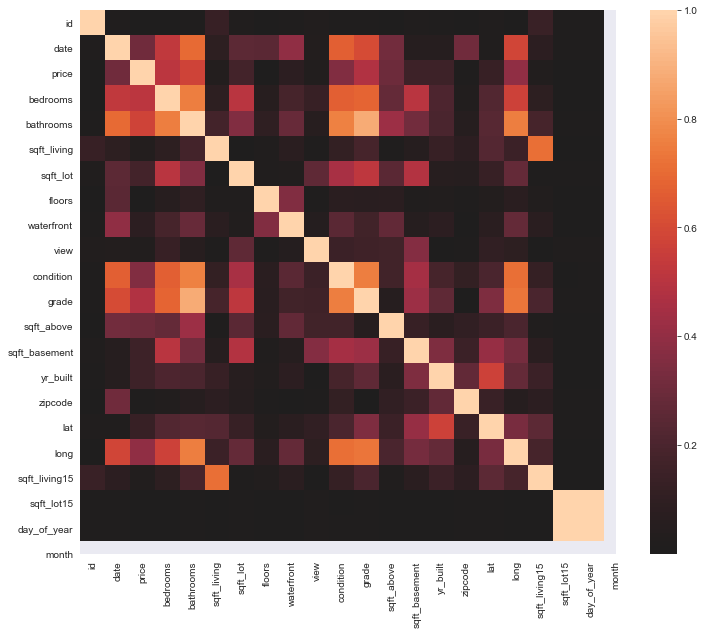

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price','date','zipcode','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.693      
Dependent Variable:        price                  AIC:                      587397.0712
Date:                      2020-07-16 13:25       BIC:                      587548.6416
No. Observations:          21534                  Log-Likelihood:           -2.9368e+05
Df Model:                  18                     F-statistic:              2706.      
Df Residuals:              21515                  Prob (F-statistic):       0.00       
R-squared:                 0.694                  Scale:                    4.1085e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36333586.1779 1593160.0677 -22.8060 0.0000 -39456298.2057 -33210874.1500
bedrooms         -35243.3642    1913.1640 -18.4215 0.0000    -38993.3077    -31493.4208
bathrooms         44844.7114    3266.4609  13.7288 0.0000     38442.2055     51247.2173
sqft_living          80.6298      21.3911   3.7693 0.0002        38.7017       122.5579
sqft_lot              0.1175       0.0483   2.4325 0.0150         0.0228         0.2121
floors             2371.2194    3611.7629   0.6565 0.5115     -4708.1039      9450.5428
waterfront       517253.6548   16883.1515  30.6373 0.0000    484161.4242    550345.8853
view              55304.3701    2110.9192  26.1992 0.0000     51166.8117     59441.9285
condition         29512.7746    2324.2858  12.6976 0.0000     24957.0018     34068.5474
grade             98287.6640    2176.2360  45.1641 0.0000     94022.0798    102553.2482
sqft_above           99.0643      21.4019   4.6288 0.0000        57.1151       141.0136
sqft_basement        65.7984      21.3838   3.0770 0.0021        23.8846       107.7123
yr_built          -2598.7322      68.9810 -37.6732 0.0000     -2733.9401     -2463.5243
lat              557779.6703   10558.2511  52.8288 0.0000    537084.7142    578474.6264
long            -116338.8031   12016.1388  -9.6819 0.0000   -139891.3273    -92786.2788
sqft_living15        25.6708       3.4612   7.4167 0.0000        18.8865        32.4551
sqft_lot15           -0.3874       0.0739  -5.2420 0.0000        -0.5323        -0.2426
day_of_year        -459.8062     160.0294  -2.8733 0.0041      -773.4758      -146.1366
month             11035.6484    4867.1472   2.2674 0.0234      1495.6786     20575.6183
---------------------------------------------------------------------------------------
Omnibus:                  18378.295            Durbin-Watson:               1.995      
Prob(Omnibus):            0.000                Jarque-Bera (JB):            1830329.057
Skew:                     3.594                Prob(JB):                    0.000      
Kurtosis:                 47.590               Condition No.:               58275501   
=======================================================================================
* The condition number is large (6e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [18]:
outcome = 'price'
x_cols = df.drop(['price','date','zipcode','floors','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.693      
Dependent Variable:        price                  AIC:                      587395.5026
Date:                      2020-07-16 13:25       BIC:                      587539.0956
No. Observations:          21534                  Log-Likelihood:           -2.9368e+05
Df Model:                  17                     F-statistic:              2866.      
Df Residuals:              21516                  Prob (F-statistic):       0.00       
R-squared:                 0.694                  Scale:                    4.1083e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36514960.5238 1569003.6451 -23.2727 0.0000 -39590324.1616 -33439596.8860
bedrooms         -35280.5921    1912.2982 -18.4493 0.0000    -39028.8386    -31532.3457
bathrooms         45426.7899    3143.7941  14.4497 0.0000     39264.7201     51588.8596
sqft_living          79.6451      21.3381   3.7325 0.0002        37.8208       121.4694
sqft_lot              0.1168       0.0483   2.4182 0.0156         0.0221         0.2114
waterfront       517275.3183   16882.8960  30.6390 0.0000    484183.5886    550367.0481
view              55353.9611    2109.5394  26.2398 0.0000     51219.1072     59488.8150
condition         29393.9112    2317.1931  12.6851 0.0000     24852.0407     33935.7818
grade             98414.8765    2167.5640  45.4034 0.0000     94166.2901    102663.4629
sqft_above          100.4378      21.2991   4.7156 0.0000        58.6900       142.1856
sqft_basement        65.8961      21.3830   3.0817 0.0021        23.9838       107.8084
yr_built          -2589.6137      67.5674 -38.3264 0.0000     -2722.0509     -2457.1766
lat              558494.8808   10501.7613  53.1811 0.0000    537910.6490    579079.1127
long            -117413.6266   11903.9334  -9.8634 0.0000   -140746.2199    -94081.0332
sqft_living15        25.3873       3.4342   7.3926 0.0000        18.6561        32.1185
sqft_lot15           -0.3890       0.0739  -5.2671 0.0000        -0.5338        -0.2443
day_of_year        -460.6798     160.0218  -2.8789 0.0040      -774.3344      -147.0252
month             11066.5254    4866.8556   2.2739 0.0230      1527.1271     20605.9237
---------------------------------------------------------------------------------------
Omnibus:                  18359.279            Durbin-Watson:               1.995      
Prob(Omnibus):            0.000                Jarque-Bera (JB):            1823448.899
Skew:                     3.588                Prob(JB):                    0.000      
Kurtosis:                 47.506               Condition No.:               57392658   
=======================================================================================
* The condition number is large (6e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [19]:
norm_candidates = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15']

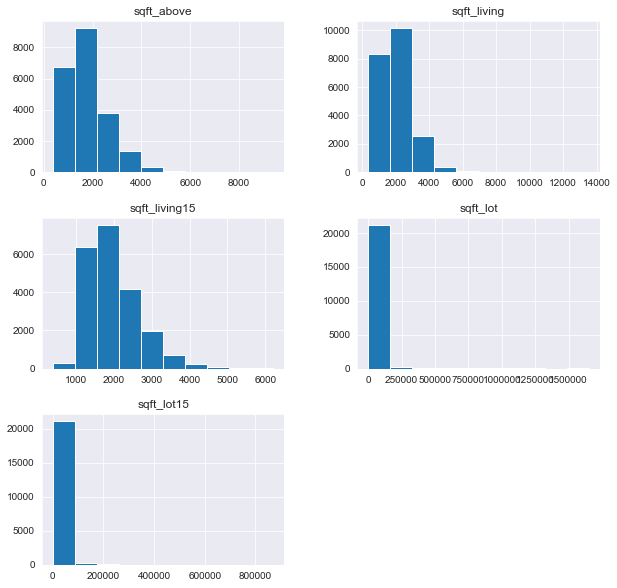

In [20]:
df[norm_candidates].hist(figsize=(10,10));

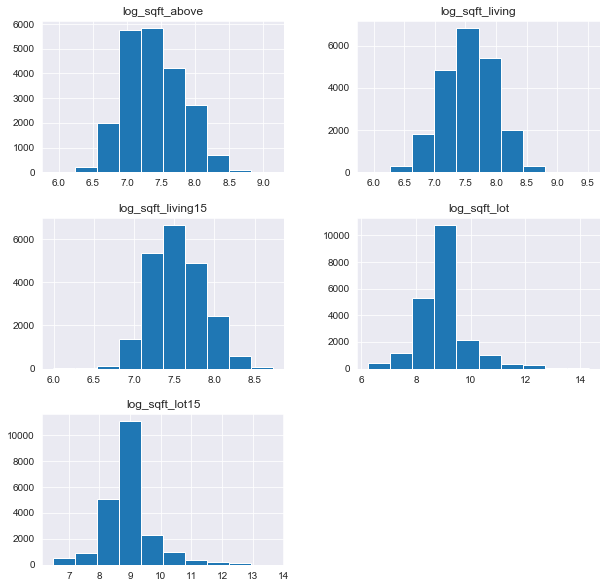

In [21]:
df_log = df.copy()

log_sqft_living = np.log(df['sqft_living'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_above = np.log(df['sqft_above'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot15 = np.log(df['sqft_lot15'])

logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

df_log[logs].hist(figsize=(10,10));

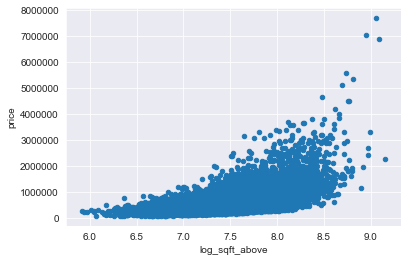

In [22]:
df_log.plot(kind = 'scatter', x = 'log_sqft_above', y = 'price')

In [23]:
df_log.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.007260,0.011592,-0.023944,0.008331,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432,-0.001617,-0.001901,-0.003106,-0.149841,-0.147627
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.242773,0.395734,0.035393,0.668307,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691,0.543377,0.612280,0.544221,0.161751,0.147952
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.000402,0.078523,0.026402,0.356095,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876,0.515985,0.621671,0.406227,0.184993,0.162340
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.058667,0.186451,-0.126682,0.665312,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133,0.695548,0.761960,0.571223,0.100529,0.091949
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.097249,0.282532,-0.059783,0.762398,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968,0.843334,0.954673,0.732090,0.344998,0.321388
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.019102,0.075298,-0.008375,0.115122,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504,0.163794,0.150194,0.145439,0.638078,0.549490
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020086,0.028436,-0.264138,0.458694,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782,0.546960,0.367001,0.274554,-0.238211,-0.228029
waterfront,-0.007260,0.242773,0.000402,0.058667,0.097249,0.019102,0.020086,1.000000,0.355341,0.015114,0.077745,0.067551,0.076216,-0.021596,0.025478,-0.013692,-0.035565,0.076970,0.027727,0.005710,0.004571,0.056758,0.074934,0.069786,0.068490,0.076269
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.355341,1.000000,0.045735,0.249727,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327,0.157283,0.245362,0.263133,0.121992,0.119399
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.015114,0.045735,1.000000,-0.147326,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347,-0.150583,-0.049835,-0.089239,0.074406,0.080398


In [24]:
df_log = df_log.drop(['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15'], axis=1)
df_log.head(2)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022


In [25]:
x_cols = df_log.drop(['price','date','id','zipcode'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model = smf.ols(formula=f, data=df_log).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
===========================================================================================
Model:                       OLS                     Adj. R-squared:            0.673      
Dependent Variable:          price                   AIC:                       588758.5919
Date:                        2020-07-16 13:25        BIC:                       588910.1622
No. Observations:            21534                   Log-Likelihood:            -2.9436e+05
Df Model:                    18                      F-statistic:               2467.      
Df Residuals:                21515                   Prob (F-statistic):        0.00       
R-squared:                   0.674                   Scale:                     4.3766e+10 
-------------------------------------------------------------------------------------------
                      Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
-------------------------------------------------------------------------------------------
Intercept         -30262507.0816 1717456.5852 -17.6205 0.0000 -33628849.5130 -26896164.6502
bedrooms             -17842.7327    2048.5021  -8.7101 0.0000    -21857.9489    -13827.5165
bathrooms             80096.8686    3354.6788  23.8762 0.0000     73521.4491     86672.2881
floors                -6048.6925    4097.0650  -1.4763 0.1399    -14079.2441      1981.8591
waterfront           537916.6981   17442.4653  30.8395 0.0000    503728.1709    572105.2252
view                  52021.8456    2184.5153  23.8139 0.0000     47740.0333     56303.6579
condition             28124.7332    2402.5282  11.7063 0.0000     23415.5996     32833.8668
grade                131936.1775    2172.4182  60.7324 0.0000    127678.0765    136194.2786
sqft_basement           296.1493       8.8535  33.4499 0.0000       278.7957       313.5028
yr_built              -2963.8727      71.0631 -41.7076 0.0000     -3103.1617     -2824.5837
lat                  550287.2120   10983.9888  50.0990 0.0000    528757.7785    571816.6456
long                 -64001.7129   12748.3141  -5.0204 0.0000    -88989.3552    -39014.0706
day_of_year            -402.5533     165.1791  -2.4371 0.0148      -726.3165       -78.7901
month                  9338.1772    5023.7139   1.8588 0.0631      -508.6749     19185.0294
log_sqft_above       579968.9848   16788.5500  34.5455 0.0000    547062.1803    612875.7894
log_sqft_living     -461441.9059   18210.8509 -25.3388 0.0000   -497136.5259   -425747.2859
log_sqft_living15     83760.8236    7339.7124  11.4120 0.0000     69374.4423     98147.2048
log_sqft_lot           7121.0353    4171.7905   1.7069 0.0878     -1055.9837     15298.0544
log_sqft_lot15       -16280.1732    4524.3172  -3.5984 0.0003    -25148.1708     -7412.1756
-------------------------------------------------------------------------------------------
Omnibus:                    19694.294             Durbin-Watson:                1.989      
Prob(Omnibus):              0.000                 Jarque-Bera (JB):             2502025.539
Skew:                       3.956                 Prob(JB):                     0.000      
Kurtosis:                   55.210                Condition No.:                2417294    
===========================================================================================
* The condition number is large (2e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df_log
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)

In [27]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
len(y_test)

4307

In [29]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 42155088347.12381
Test Mean Squarred Error: 50110129344.378525


In [30]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 205317.04348914584
Test Root Mean Squarred Error: 223852.91899901268


In [31]:
df_final = df_log

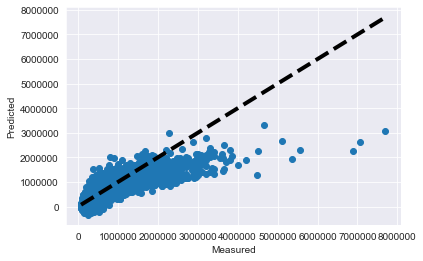

In [32]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

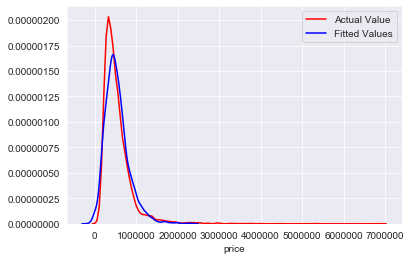

In [33]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Dealing with transformations

**Example A: No transformations**  

DV = Intercept + B1 * IV + Error  
"One unit increase in IV is associated with a (B1) unit increase in DV."

**Example B: Outcome transformed**

log(DV) = Intercept + B1 * IV + Error   
"One unit increase in IV is associated with a (B1 * 100) percent increase in DV."

**Example C: Exposure transformed**

DV = Intercept + B1 * log(IV) + Error   
"One percent increase in IV is associated with a (B1 / 100) unit increase in DV."

**Example D: Outcome transformed and exposure transformed**

log(DV) = Intercept + B1 * log(IV) + Error   
"One percent increase in IV is associated with a (B1) percent increase in DV."

https://stats.stackexchange.com/questions/18480/interpretation-of-log-transformed-predictor-and-or-response

### Dealing with zipcodes

In [34]:
df_test = df_log.copy()

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 23 columns):
id                   21534 non-null int64
date                 21534 non-null datetime64[ns]
price                21534 non-null float64
bedrooms             21534 non-null int64
bathrooms            21534 non-null float64
floors               21534 non-null float64
waterfront           21534 non-null float64
view                 21534 non-null float64
condition            21534 non-null int64
grade                21534 non-null int64
sqft_basement        21534 non-null float64
yr_built             21534 non-null int64
zipcode              21534 non-null int64
lat                  21534 non-null float64
long                 21534 non-null float64
day_of_year          21534 non-null int64
month                21534 non-null int64
log_sqft_above       21534 non-null float64
log_sqft_living      21534 non-null float64
log_sqft_living15    21534 non-null float64
log_sqft_lot        

In [37]:
col1        = 'lat'
col2        = 'long'
conditions  = [ (df_test[col1] > 47.5), (df_test[col1] < 47.5) ]
choices     = [ "1", '2']

In [38]:
df_test["sector"] = np.select(conditions, choices, default=np.nan)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
id                   21534 non-null int64
date                 21534 non-null datetime64[ns]
price                21534 non-null float64
bedrooms             21534 non-null int64
bathrooms            21534 non-null float64
floors               21534 non-null float64
waterfront           21534 non-null float64
view                 21534 non-null float64
condition            21534 non-null int64
grade                21534 non-null int64
sqft_basement        21534 non-null float64
yr_built             21534 non-null int64
zipcode              21534 non-null int64
lat                  21534 non-null float64
long                 21534 non-null float64
day_of_year          21534 non-null int64
month                21534 non-null int64
log_sqft_above       21534 non-null float64
log_sqft_living      21534 non-null float64
log_sqft_living15    21534 non-null float64
log_sqft_lot        

In [40]:
df_test.sector.value_counts()

1      14949
2       6582
nan        3
Name: sector, dtype: int64

In [56]:
df_test.loc[(df_test['lat'] > 47.5 ) & (df_test['long'] > -122.5), "sector_2"] = 1

In [60]:
df_test.sector_2.value_counts()

1.0    14949
Name: sector_2, dtype: int64